# Coding Part of EC2B1 Project

Imports

In [154]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from get_regression_coefs import get_regression_coefs

# Part A Long Run Trends

 Data Logistics


In [155]:
# Set the style for the plot and figure size

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.titlesize'] = 15

# 1.Load the dataset from the Excel file
df = pd.read_excel('pwt100.xlsx', sheet_name = 'Data')

# 2.Extracting only the necessary columns from the dataset
columns_to_keep = ["countrycode", "year", "rgdpna", "pop", "emp", "rnna"]
df = df.loc[:, columns_to_keep]

# 3.Crating log(real GDP) 
df['log(rgdpna)'] = np.log(df["rgdpna"])

# 4.Obtain the data for Argentina
arg_df = df.loc[df["countrycode"] == "ARG"].copy()
arg_df.drop('countrycode', axis=1, inplace=True)
arg_df.reset_index(drop=True, inplace=True)
y_arg = arg_df['log(rgdpna)']

# 5.Obtain the data for France
fra_df = df.loc[df["countrycode"] == "FRA"].copy()
fra_df.drop('countrycode', axis=1, inplace=True)
fra_df.reset_index(drop=True, inplace=True)
y_fra = fra_df['log(rgdpna)']

Data Manipulation - Argentina

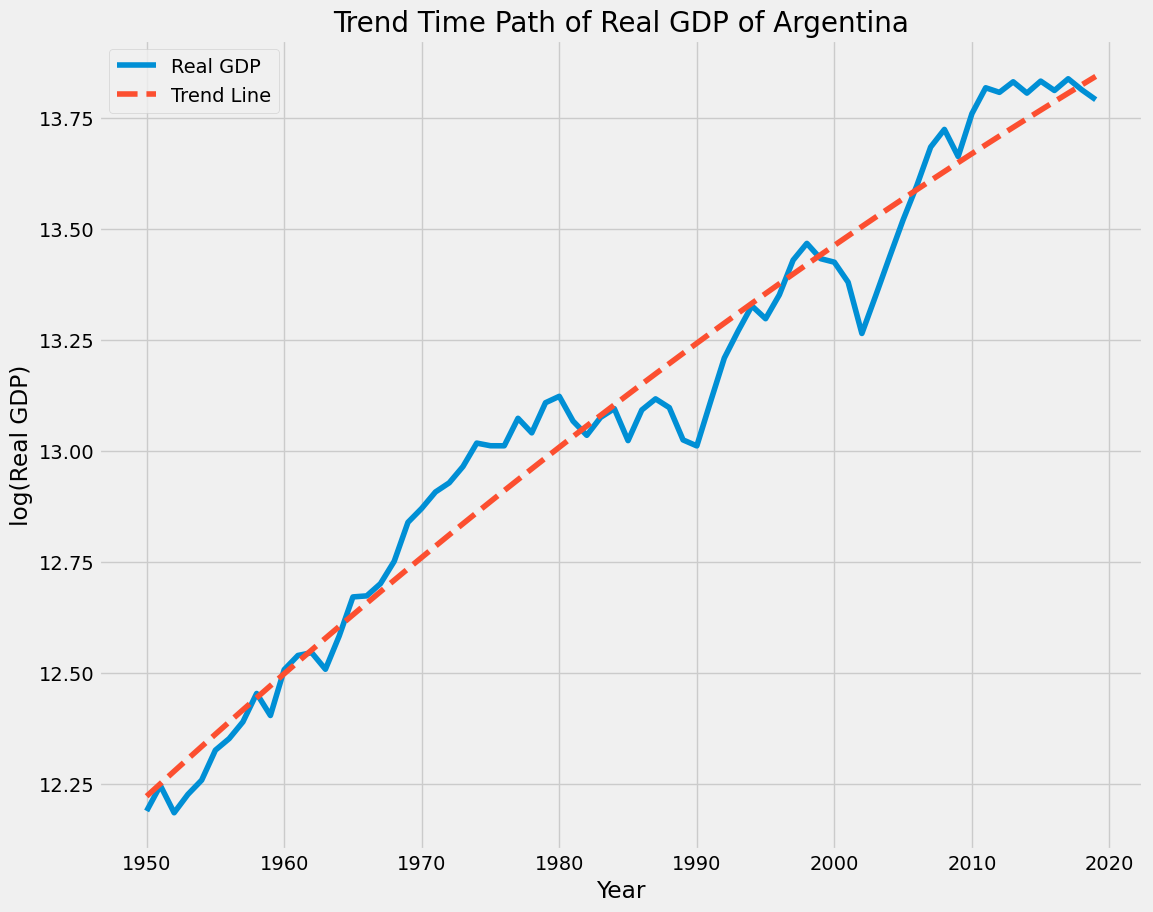

In [156]:
# Using log models for Argentina
T = len(arg_df)

# Create regressors x1, x2, and x3
x1 = np.empty(T)
x2 = np.empty(T)
x3 = np.empty(T)

for t in range(T):
    x1[t] = 1.0
    x2[t] = t + 1
    x3[t] = (t + 1)**2

# Get the regression coefficients using the get_regression_coefs function
a_exp_quad, b1_exp_quad, b2_exp_quad = get_regression_coefs(y_arg, x1, x2, x3)

# Initialize the predicted values yhat
yhat_arg = np.empty(T)

# Compute the trend for all years
for t in range(T):
    yhat_arg[t] = a_exp_quad + b1_exp_quad * (t + 1) + b2_exp_quad * (t + 1)**2
    
# Plot the data and the exponential quadratic fit for Argentina
plt.plot(arg_df['year'], y_arg, label='Real GDP')
plt.plot(arg_df['year'], yhat_arg, linestyle='dashed', label='Trend Line')
plt.title('Trend Time Path of Real GDP of Argentina', size=20)
plt.xlabel('Year')
plt.ylabel('log(Real GDP)')
plt.legend()


Data Manipulation - France

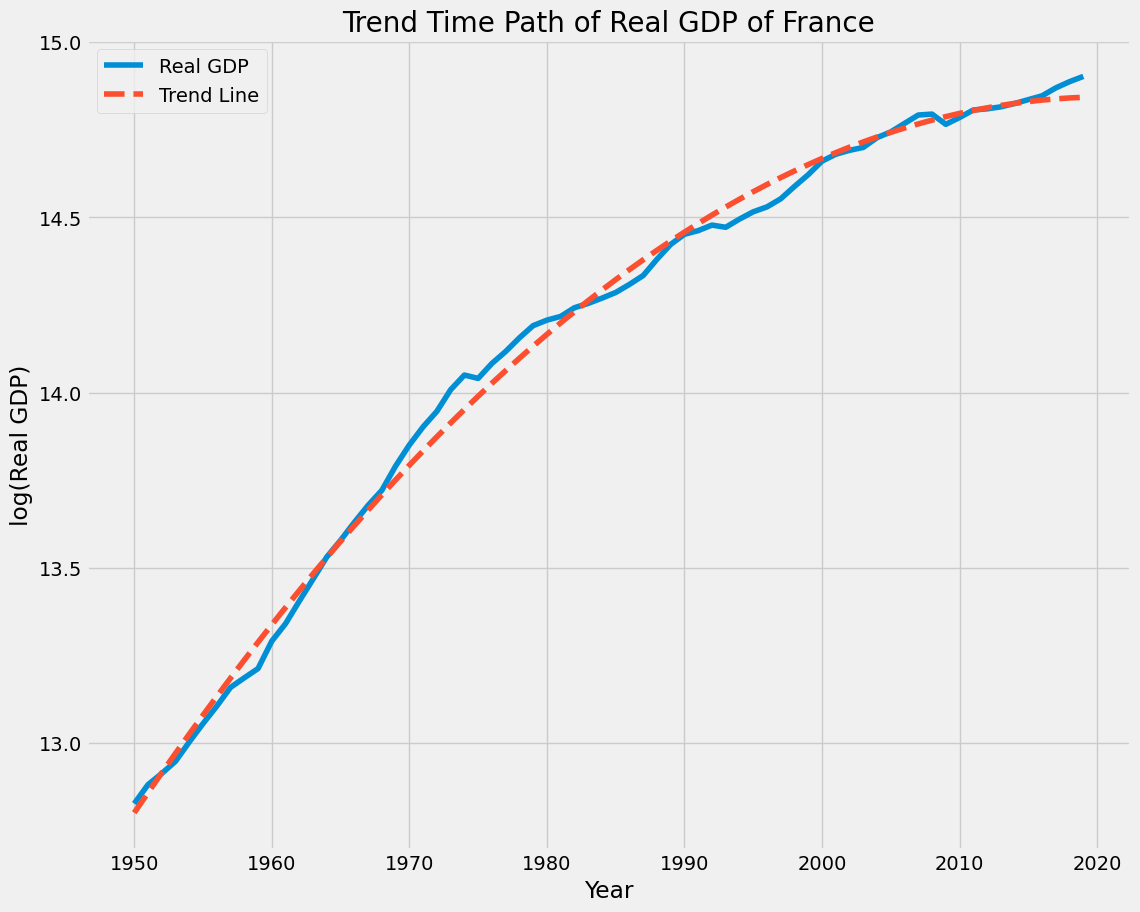

In [157]:
# Create regressors for the log model for France
T = len(fra_df)
x1, x2, x3 = np.empty(T), np.empty(T), np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1
    x3[t] = (t + 1)**2

# Estimate coefficients for the log for France
a_exp_quad, b1_exp_quad, b2_exp_quad = get_regression_coefs(y_fra, x1, x2, x3)

# Initialise predicted values yhat
yhat_fra = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_fra[t] = a_exp_quad + b1_exp_quad * (t + 1) + b2_exp_quad * (t + 1)**2
    
# Plotting the actual and predicted values for France
plt.plot(fra_df['year'], y_fra, label='Real GDP')
plt.plot(fra_df['year'], yhat_fra, linestyle='dashed', label='Trend Line')
plt.title('Trend Time Path of Real GDP of France', fontsize=20)
plt.xlabel('Year')
plt.ylabel('log(Real GDP)')
plt.legend()

# Part B Production Function

Production function: $Y=A \times L^\alpha \times K ^{1-\alpha} $

TFP is the weighted average of labour and capital input divided by output, we assume a weighting of 0.7 for labour and 0.3 for capital i.e. alpha = 0.7

Text(0, 0.5, 'Total Factor Productivity')

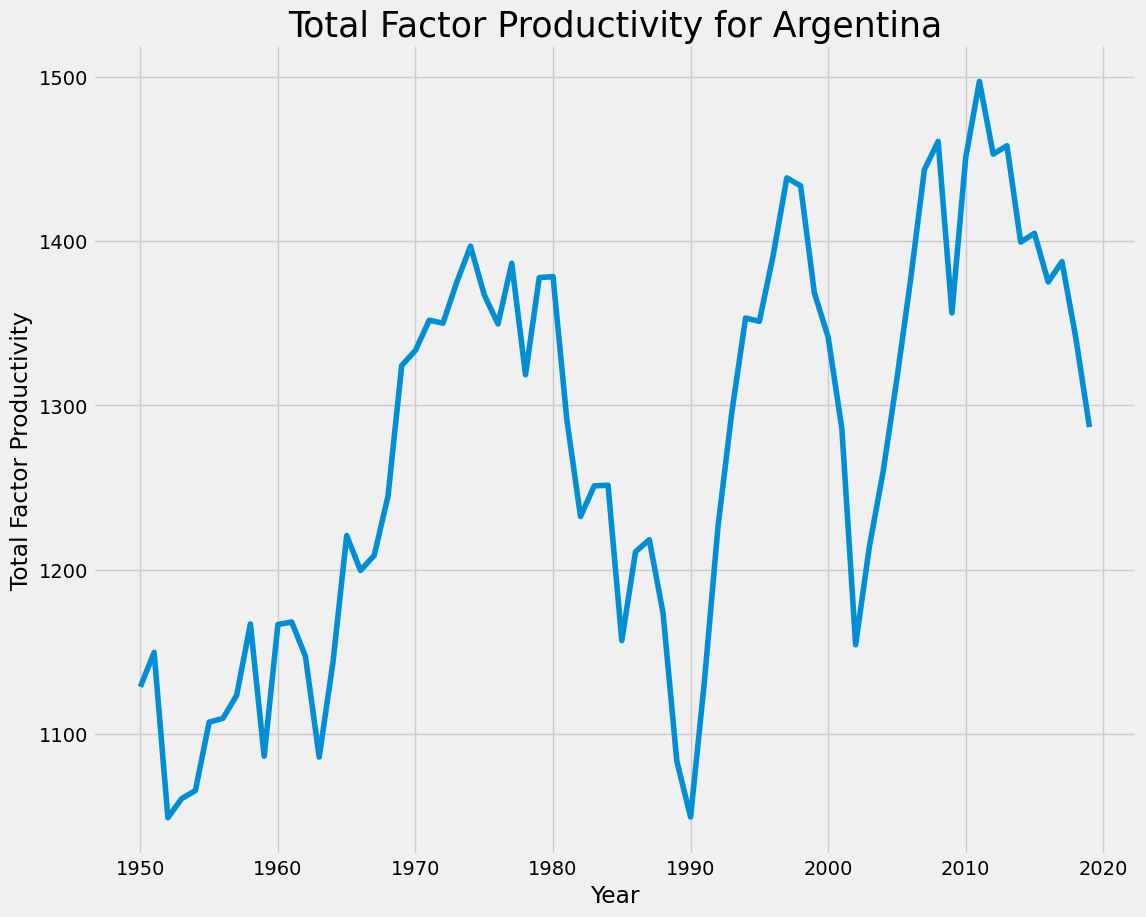

In [158]:
alpha = 0.7

# Plot TFP for Argentina
arg_df['TFP'] = arg_df['rgdpna'] / ((arg_df['emp'])**alpha * (arg_df['rnna']**(1 - alpha)))
plt.plot(arg_df['year'], arg_df['TFP'])
plt.title('Total Factor Productivity for Argentina', size = 25)
plt.xlabel('Year')
plt.ylabel('Total Factor Productivity')

Text(0, 0.5, 'Total Factor Productivity')

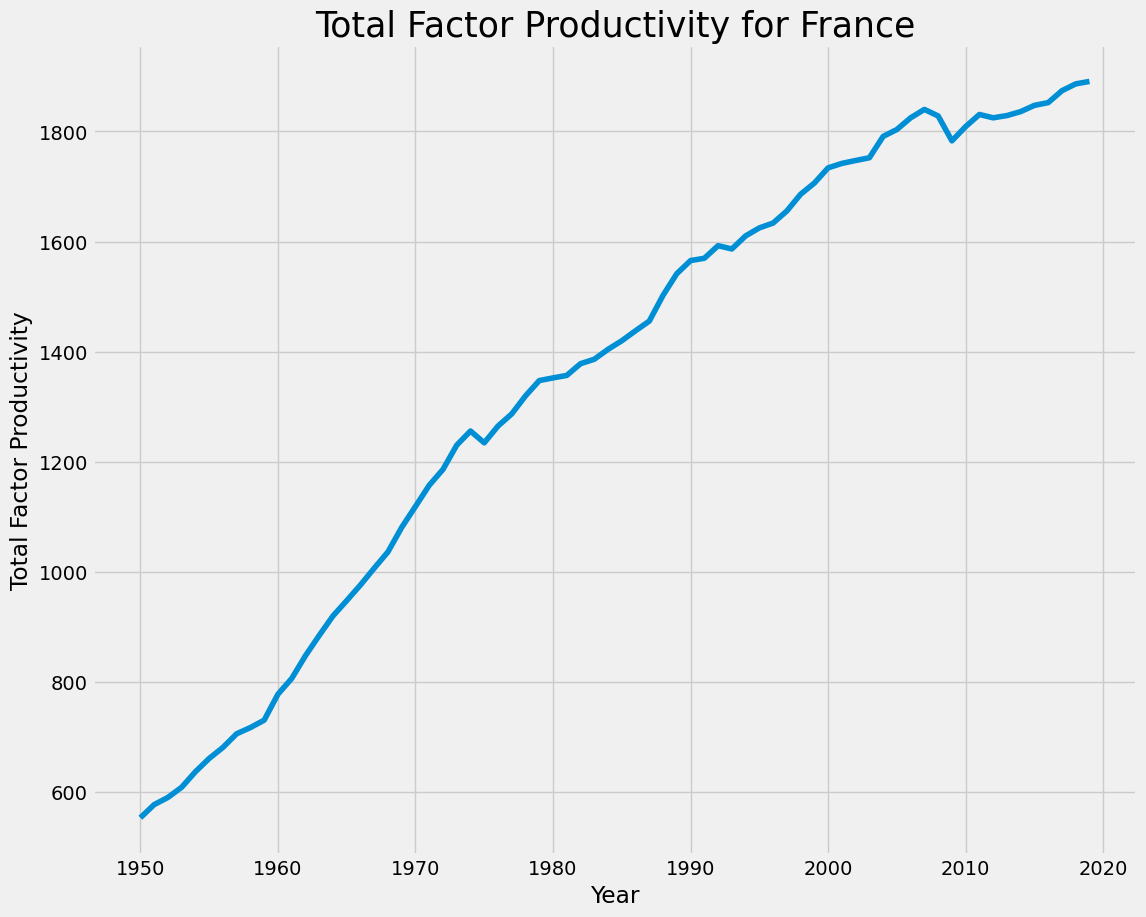

In [159]:
# Plot TFP for France
fra_df['TFP'] = fra_df['rgdpna'] / ((fra_df['emp'])**alpha * (fra_df['rnna']**(1 - alpha)))
plt.plot(fra_df['year'], fra_df['TFP'])
plt.title('Total Factor Productivity for France', size = 25)
plt.xlabel('Year')
plt.ylabel('Total Factor Productivity')

# Part C Growth Accounting*

*See appendix below

Argentina

In [186]:
# Calculate growth contributions
T = arg_df.shape[0]
arg_dlog_y = np.empty(T-1)
arg_dlog_A = np.empty(T-1)
arg_dlog_k = np.empty(T-1)
arg_dlog_l = np.empty(T-1)
for t in range(T-1):
    arg_dlog_y[t] = np.log(arg_df['rgdpna'][t+1]) - np.log(arg_df['rgdpna'][t])
    arg_dlog_A[t] = np.log(arg_df['TFP'][t+1]) - np.log(arg_df['TFP'][t])
    arg_dlog_k[t] = np.log(arg_df['rnna'][t+1]) - np.log(arg_df['rnna'][t])
    arg_dlog_l[t] = np.log(arg_df['emp'][t+1]) - np.log(arg_df['emp'][t])

#TFP contribution
arg_contr_TFP = arg_dlog_A / arg_dlog_y
#Capital contribution
arg_contr_k = ((1 - alpha) * arg_dlog_k) / arg_dlog_y
#Labout contribution
arg_contr_l = (alpha * arg_dlog_l) / arg_dlog_y

# Print table of growth contribution for Argentina
data = {'Growth of Y' : arg_dlog_y, 'Growth of TFP' : arg_dlog_A,
        'Growth of K' : arg_dlog_k, 'Growth of L' : arg_dlog_l,
        'TFP Component' : arg_contr_TFP,
        'K Component' : arg_contr_k,
        'L Component' : arg_contr_l}
arg_growth_df = pd.DataFrame(data = data, index = [str(1950 + x) + "-" + str(1951 + x) for x in range(T-1)])
arg_growth_df.index.name = "Time Period"
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(arg_growth_df.iloc[:, 4:])


             TFP Component  K Component  L Component
Time Period                                         
1950-1951         0.320034     0.488734     0.191232
1951-1952         1.491704    -0.313009    -0.178695
1952-1953         0.266993     0.467516     0.265492
1953-1954         0.144155     0.513370     0.342475
1954-1955         0.568046     0.269424     0.162530
1955-1956         0.078794     0.560865     0.360342
1956-1957         0.332283     0.418974     0.248743
1957-1958         0.593996     0.259339     0.146666
1958-1959         1.440110    -0.251154    -0.188957
1959-1960         0.690303     0.218759     0.090938
1960-1961         0.040384     0.683927     0.275689
1961-1962        -2.826643     2.442421     1.384222
1962-1963         1.468322    -0.232348    -0.235974
1963-1964         0.689954     0.192102     0.117944
1964-1965         0.742740     0.156943     0.100317
1965-1966        -7.449349     4.830581     3.618768
1966-1967         0.277249     0.412417     0.

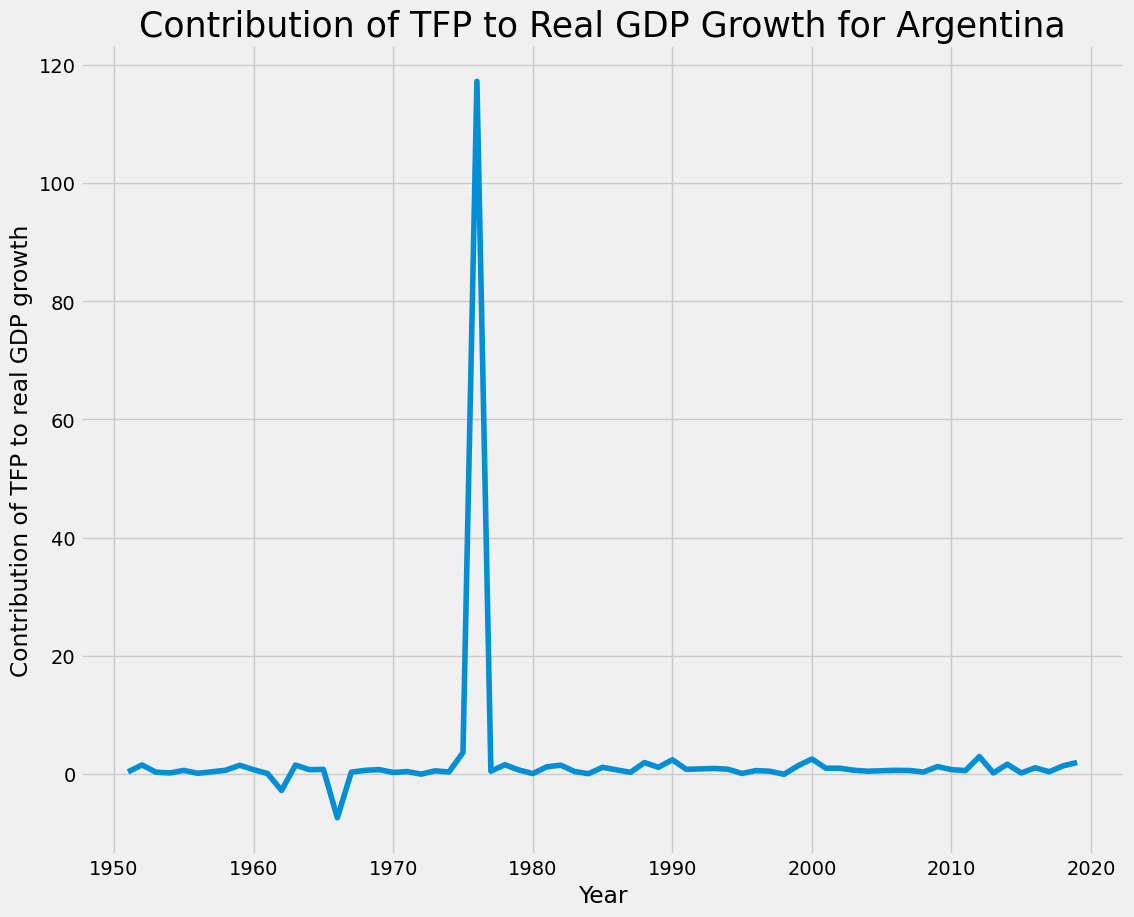

In [187]:
# Plot the contribution of TFP, capital, and labor for Argentina
plt.plot([1951 + i for i in range(T-1)], arg_contr_TFP)
plt.title('Contribution of TFP to Real GDP Growth for Argentina', size = 25)
plt.xlabel('Year')
plt.ylabel('Contribution of TFP to real GDP growth')
plt.show()

Text(0.5, 0, 'Year')

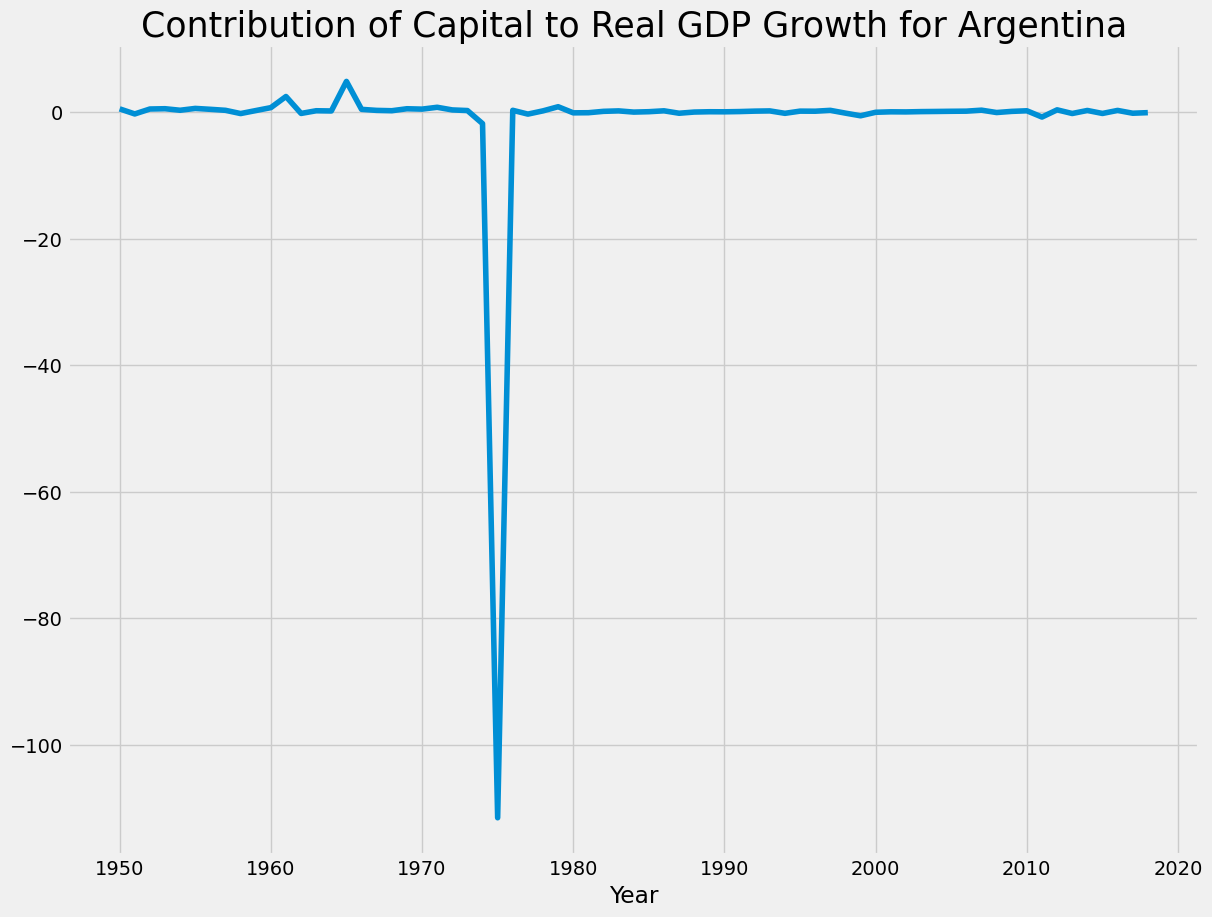

In [101]:
plt.plot([1950 + i for i in range(T-1)], arg_contr_k)
plt.title('Contribution of Capital to Real GDP Growth for Argentina', size = 25)
plt.xlabel('Year')

Text(0, 0.5, 'Contribution of Labour to real GDP growth')

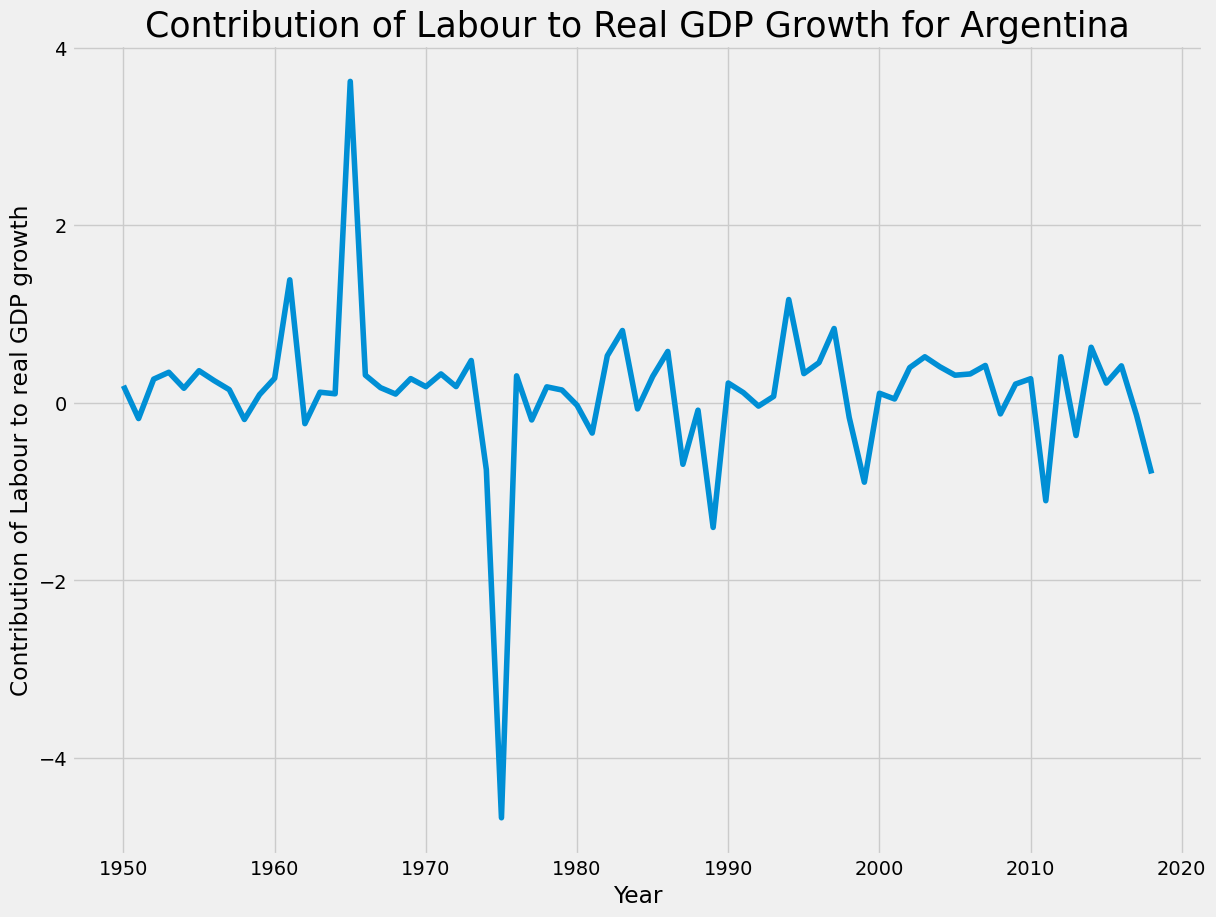

In [102]:
plt.plot([1950 + i for i in range(T-1)], arg_contr_l)
plt.title('Contribution of Labour to Real GDP Growth for Argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of Labour to real GDP growth')

Text(0, 0.5, 'Contribution of real GDP growth')

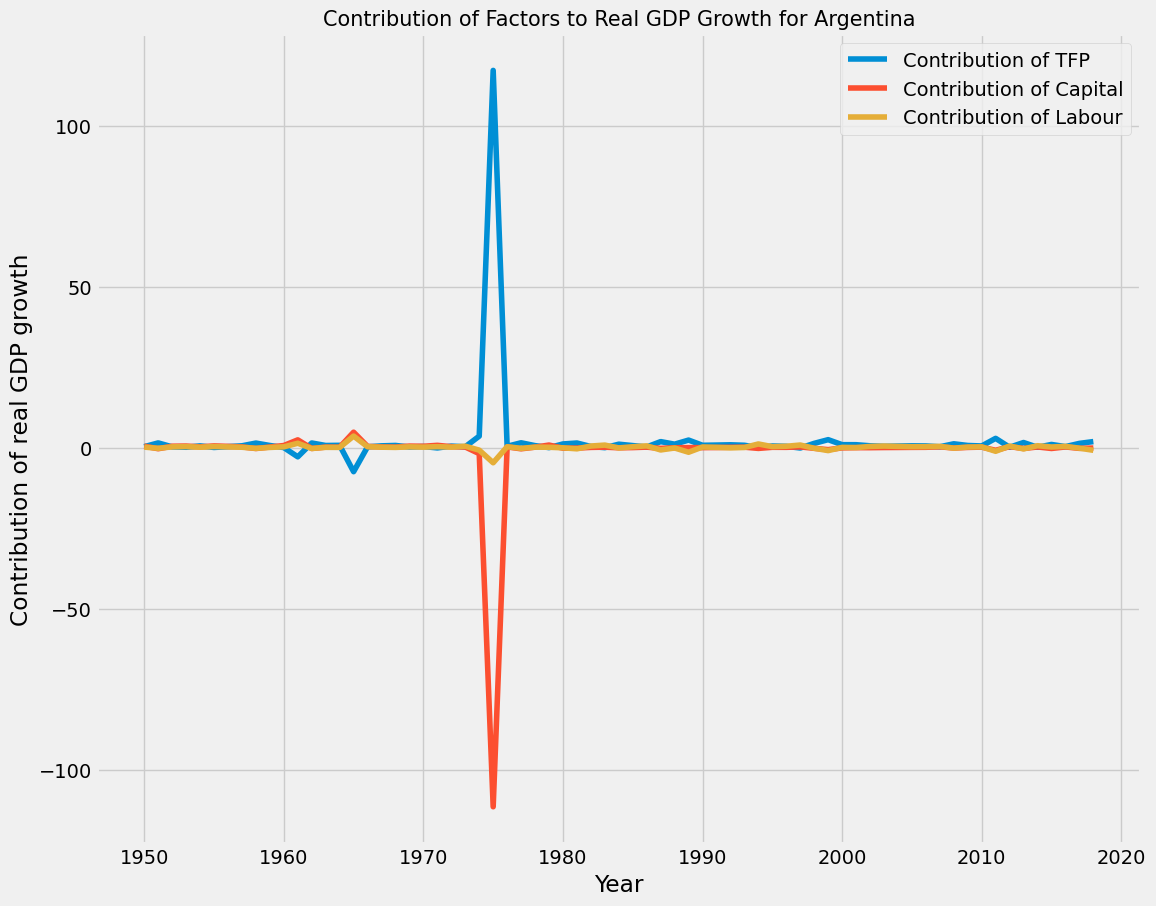

In [200]:
plt.plot([1950 + i for i in range(T-1)], arg_contr_TFP)
plt.plot([1950 + i for i in range(T-1)], arg_contr_k)
plt.plot([1950 + i for i in range(T-1)], arg_contr_l)

plt.legend(['Contribution of TFP', 'Contribution of Capital', 'Contribution of Labour'])
plt.title('Contribution of Factors to Real GDP Growth for Argentina')
plt.xlabel('Year')
plt.ylabel('Contribution of real GDP growth')

Text(0, 0.5, 'Percentage Change')

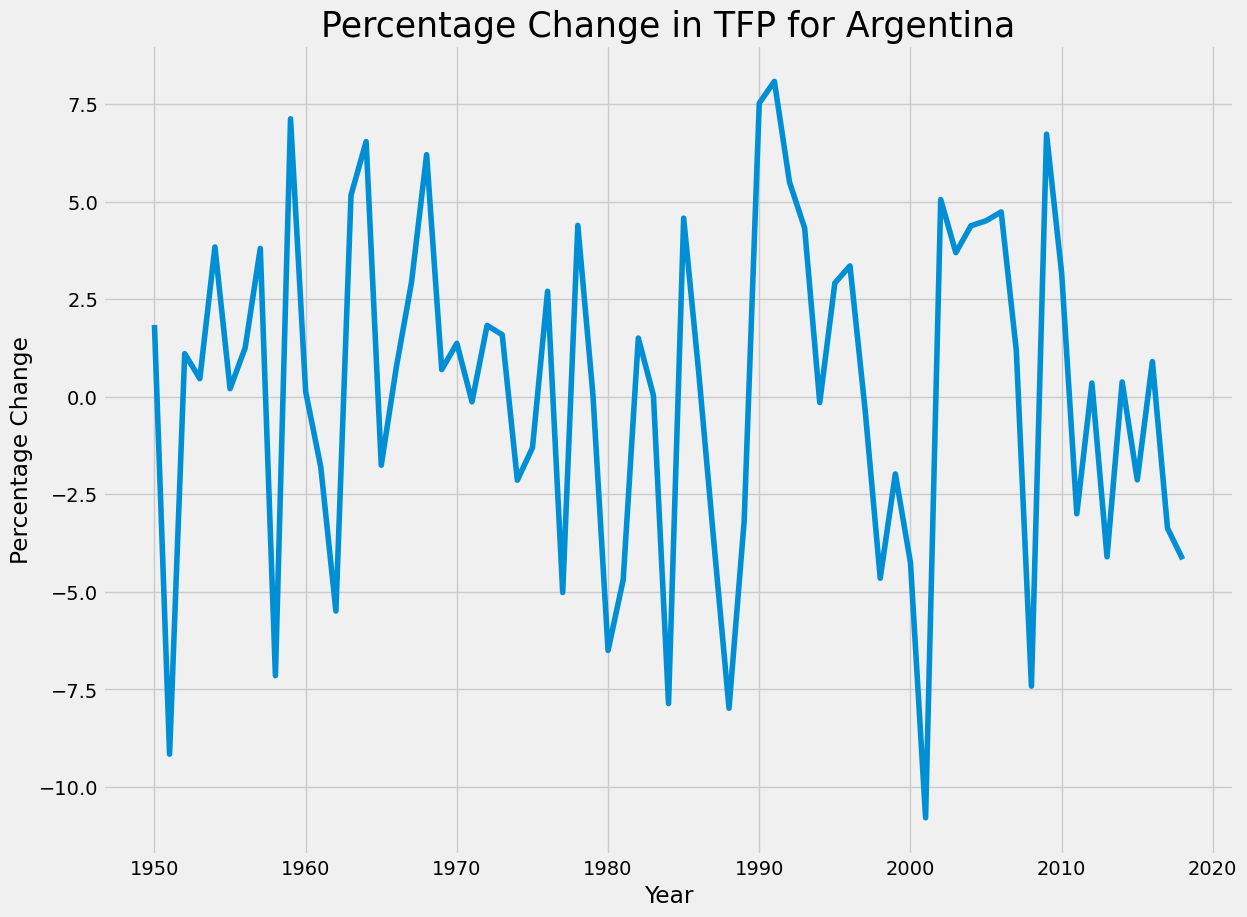

In [103]:
plt.plot([1950 + i for i in range(T-1)], arg_dlog_A*100)
plt.title('Percentage Change in TFP for Argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

France

In [161]:
#Calculating growth contributions
T = fra_df.shape[0]
fra_dlog_y = np.empty(T-1)
fra_dlog_A = np.empty(T-1)
fra_dlog_k = np.empty(T-1)
fra_dlog_l = np.empty(T-1)
for t in range(T-1):
    fra_dlog_y[t] = np.log(fra_df['rgdpna'][t+1]) - np.log(fra_df['rgdpna'][t])
    fra_dlog_A[t] = np.log(fra_df['TFP'][t+1]) - np.log(fra_df['TFP'][t])
    fra_dlog_k[t] = np.log(fra_df['rnna'][t+1]) - np.log(fra_df['rnna'][t])
    fra_dlog_l[t] = np.log(fra_df['emp'][t+1]) - np.log(fra_df['emp'][t])

#TFP contribution
fra_contr_TFP = fra_dlog_A / fra_dlog_y
#Capital contribution
fra_contr_k = ((1 - alpha) * fra_dlog_k) / fra_dlog_y
#Labour contribution
fra_contr_l = (alpha * fra_dlog_l) / fra_dlog_y

# print table of growth contributions
data = {'Growth of Y' : fra_dlog_y, 'Growth of TFP' : fra_dlog_A,
        'Growth of K' : fra_dlog_k, 'Growth of L' : fra_dlog_l,
        'TFP Component' : fra_contr_TFP,
        'K Component' : fra_contr_k,
        'L Component' : fra_contr_l}

fra_growth_df = pd.DataFrame(data = data, index = [str(1950 + x) + "-" + str(1951 + x) for x in range(T-1)])
fra_growth_df.index.name = "Time Period"
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fra_growth_df.iloc[:, 4:])

             TFP Component  K Component  L Component
Time Period                                         
1950-1951         0.780455     0.131007     0.088537
1951-1952         0.701316     0.209704     0.088980
1952-1953         0.887858     0.187674    -0.075533
1953-1954         0.819050     0.155361     0.025589
1954-1955         0.709652     0.186274     0.104074
1955-1956         0.601033     0.222962     0.176005
1956-1957         0.669961     0.230414     0.099625
1957-1958         0.578824     0.483618    -0.062442
1958-1959         0.702178     0.440581    -0.142759
1959-1960         0.797989     0.186838     0.015173
1960-1961         0.723619     0.281957    -0.005576
1961-1962         0.777632     0.231083    -0.008715
1962-1963         0.677234     0.239857     0.082909
1963-1964         0.621216     0.261576     0.117209
1964-1965         0.627658     0.327129     0.045213
1965-1966         0.578789     0.316002     0.105209
1966-1967         0.632917     0.326982     0.

Text(0, 0.5, 'Contribution of TFP to real GDP growth')

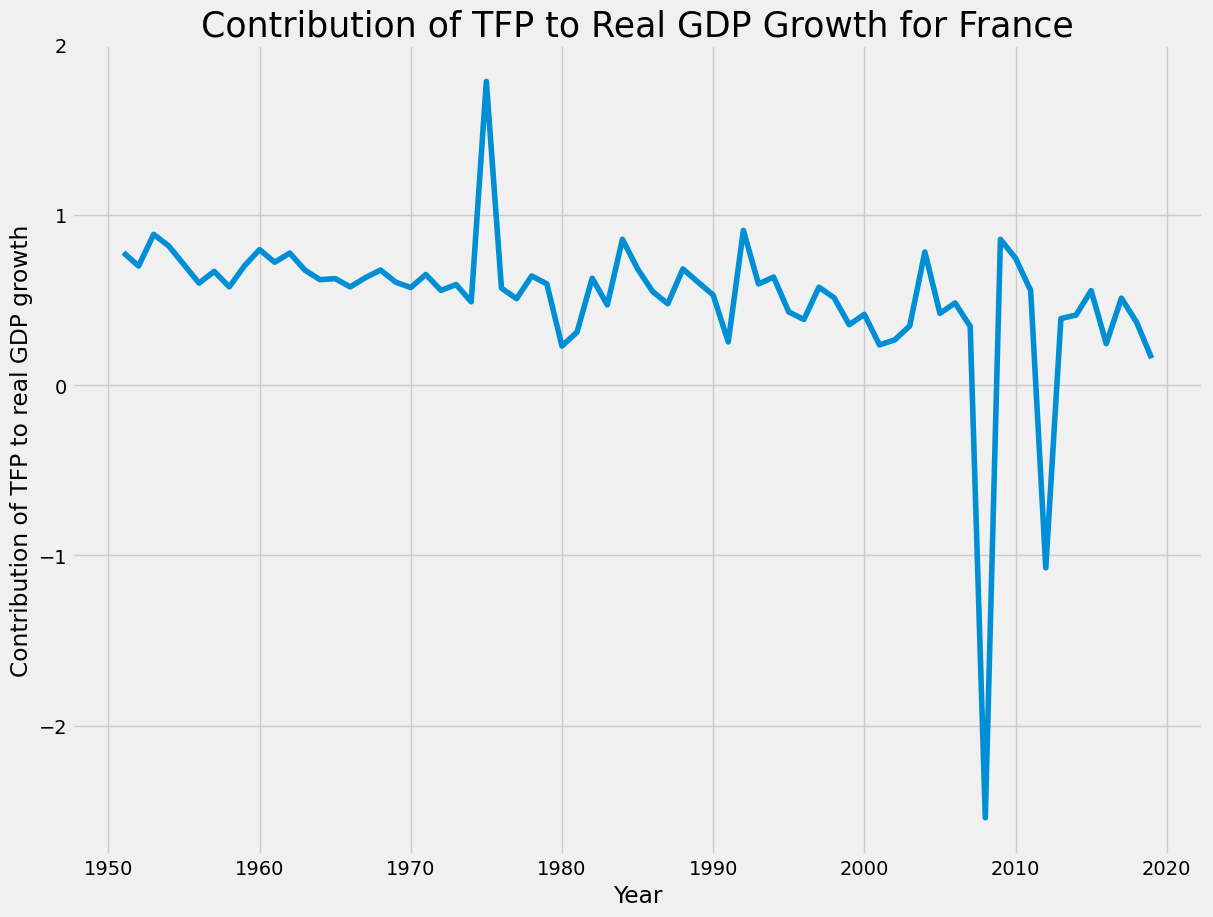

In [105]:
# plot contributions
plt.plot([1951 + i for i in range(T-1)], fra_contr_TFP)
plt.title('Contribution of TFP to Real GDP Growth for France', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of TFP to real GDP growth')

Text(0, 0.5, 'Contribution of Capital to real GDP growth')

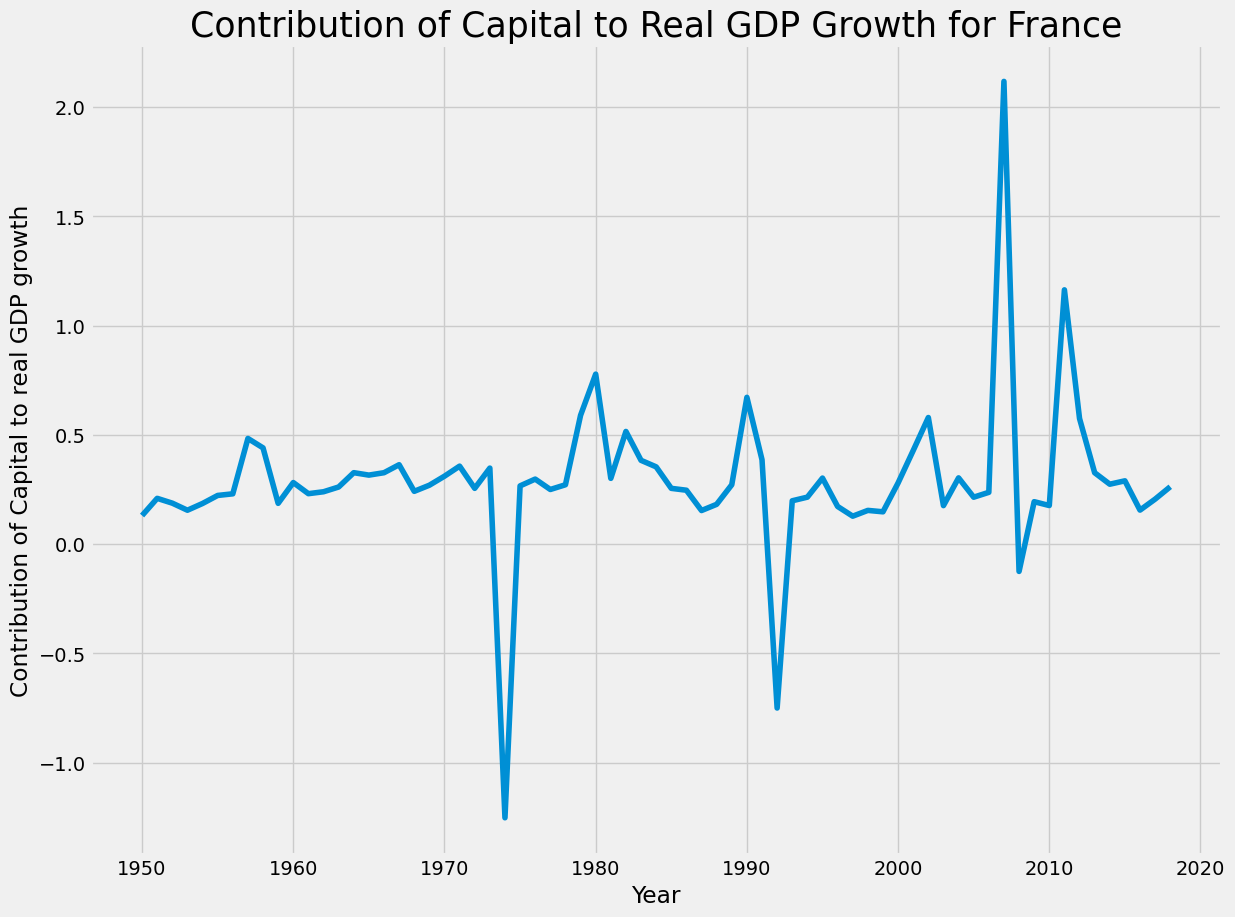

In [106]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_k)
plt.title('Contribution of Capital to Real GDP Growth for France', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of Capital to real GDP growth')

Text(0, 0.5, 'Contribution of Labour to real GDP growth')

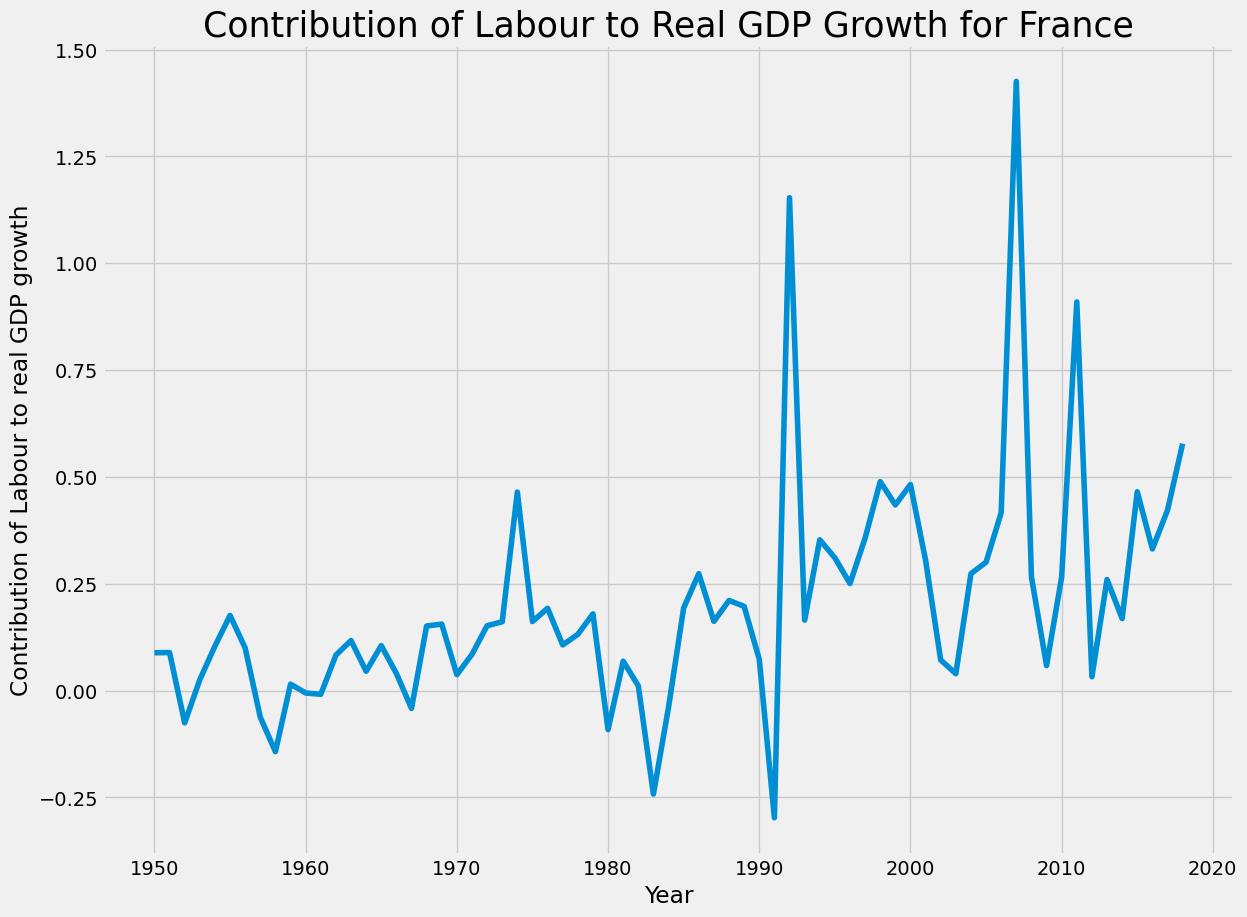

In [107]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_l)
plt.title('Contribution of Labour to Real GDP Growth for France', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of Labour to real GDP growth')

Text(0, 0.5, 'Contribution of real GDP growth')

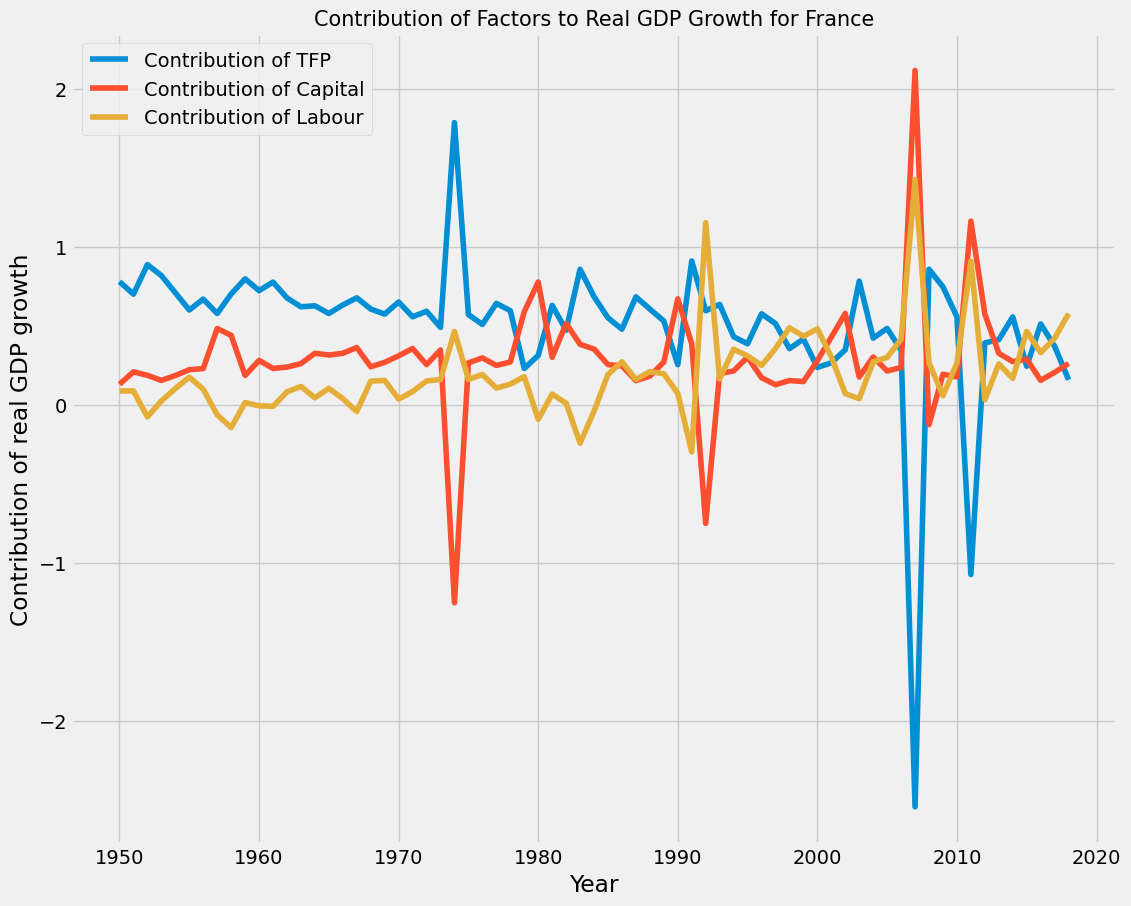

In [198]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_TFP)
plt.plot([1950 + i for i in range(T-1)], fra_contr_k)
plt.plot([1950 + i for i in range(T-1)], fra_contr_l)

plt.legend(['Contribution of TFP', 'Contribution of Capital', 'Contribution of Labour'])
plt.title('Contribution of Factors to Real GDP Growth for France')
plt.xlabel('Year')
plt.ylabel('Contribution of real GDP growth')

Text(0, 0.5, 'Percentage Change')

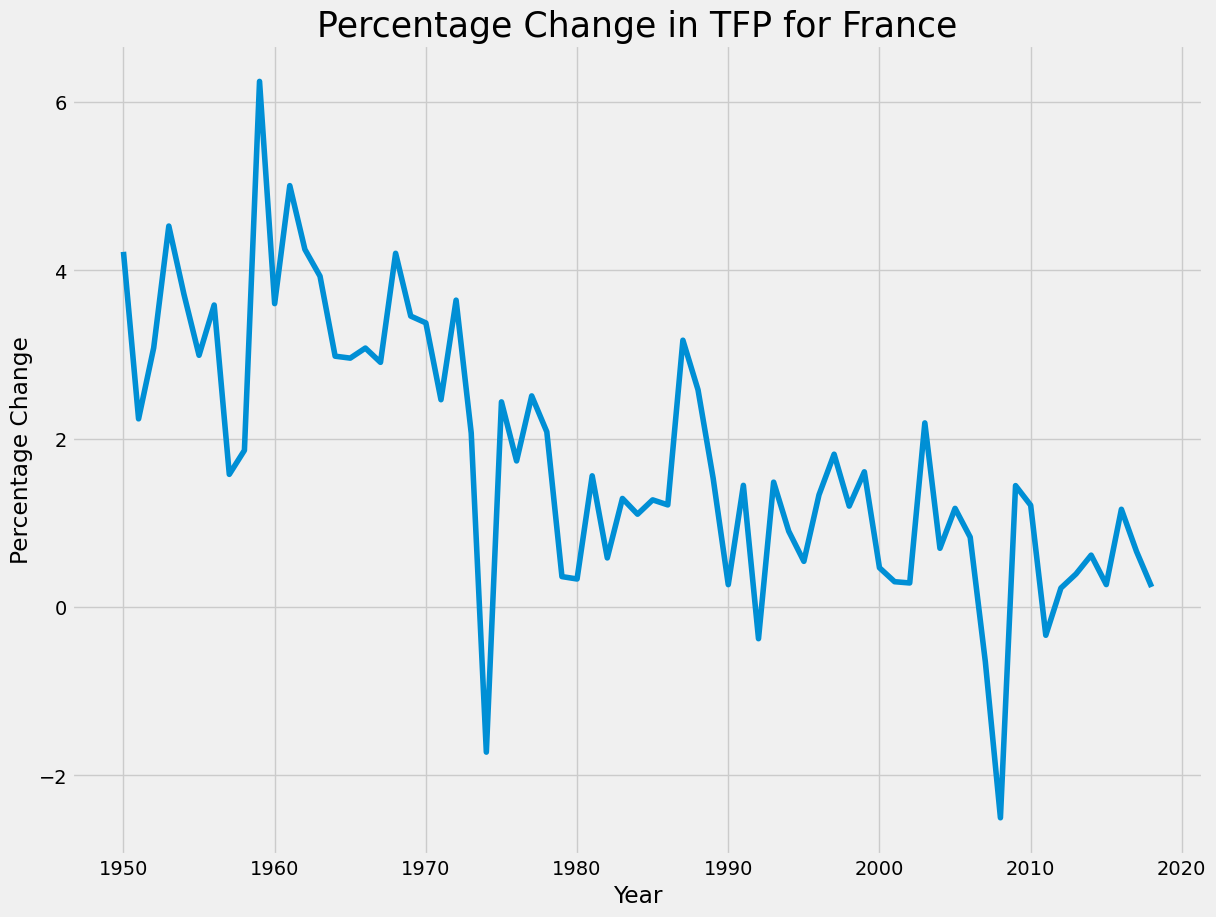

In [108]:
plt.plot([1950 + i for i in range(T-1)], fra_dlog_A*100)
plt.title('Percentage Change in TFP for France', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

# Additional Graphs for Essay Component

0.02320869376552627


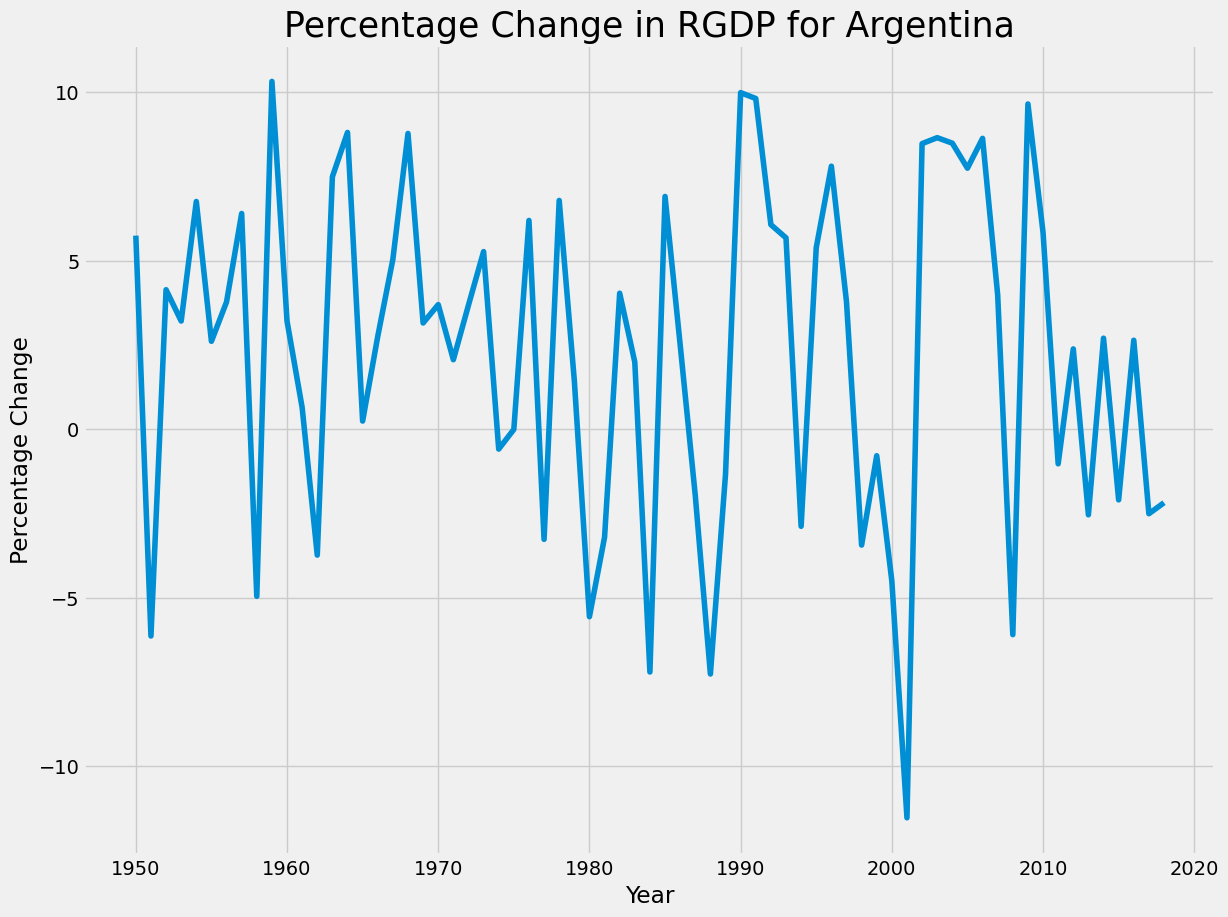

In [109]:
plt.plot([1950 + i for i in range(T-1)], arg_dlog_y*100)
plt.title('Percentage Change in RGDP for Argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

print(arg_dlog_y.mean(axis=None))

0.009249613831313808


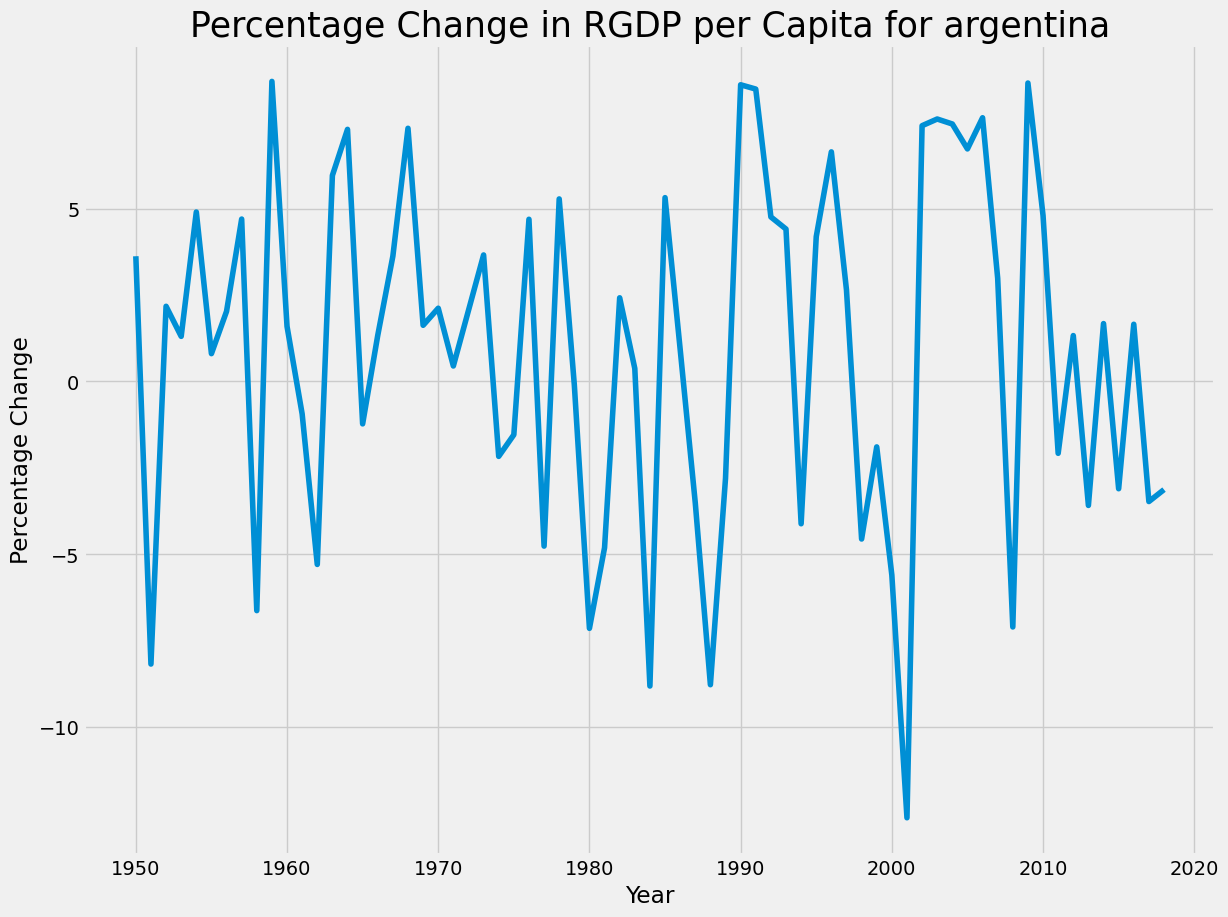

In [110]:
T = arg_df.shape[0]
arg_dlog_ypc = np.empty(T-1)

for t in range(T-1):
    arg_dlog_ypc[t] = y_arg[t+1] - y_arg[t]
    

plt.plot([1950 + i for i in range(T-1)], arg_dlog_ypc*100)
plt.title('Percentage Change in RGDP per Capita for argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

print(arg_dlog_ypc.mean(axis=None))

0.03006898016579207


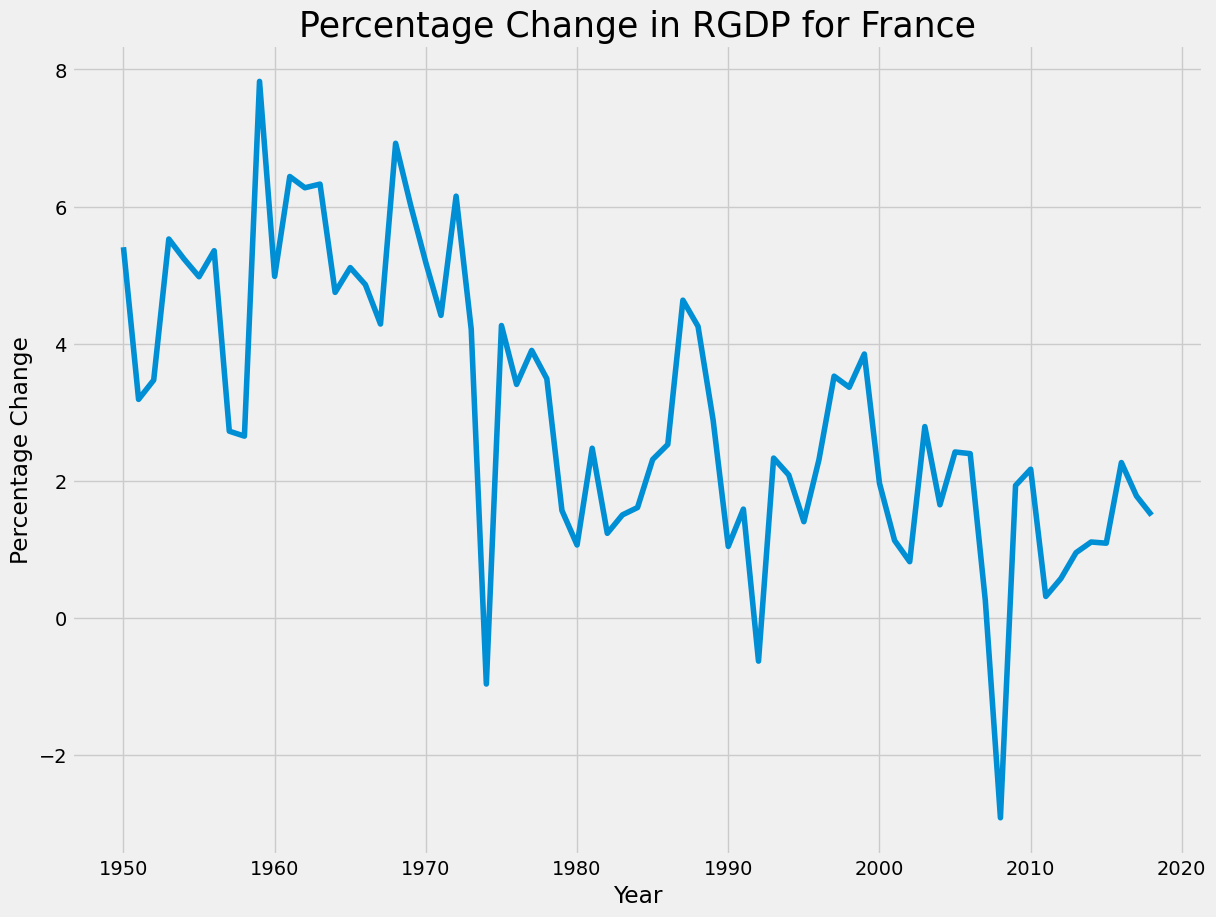

In [111]:
plt.plot([1950 + i for i in range(T-1)], fra_dlog_y*100)
plt.title('Percentage Change in RGDP for France', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

print(fra_dlog_y.mean(axis=None))

0.02341327586875243


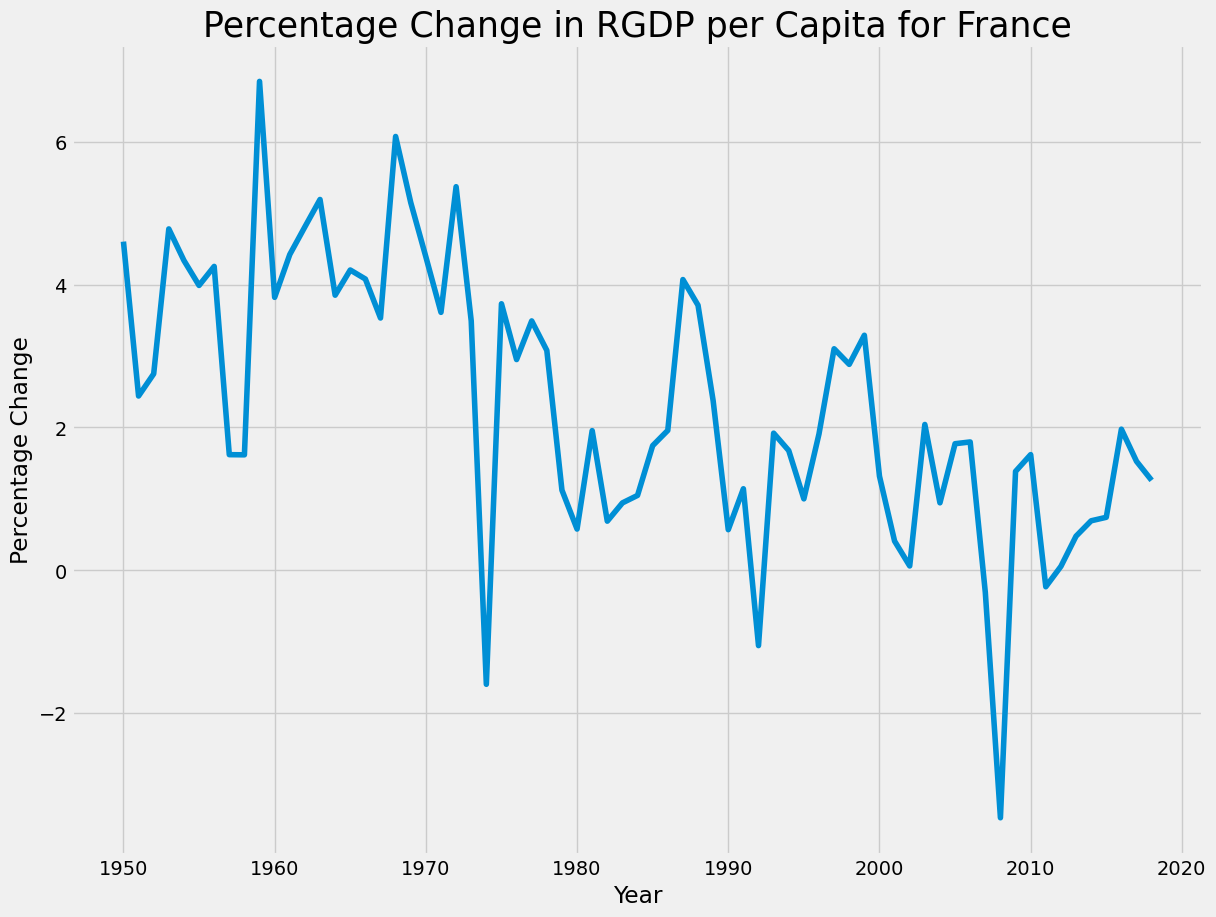

In [112]:
T = fra_df.shape[0]
fra_dlog_ypc = np.empty(T-1)

for t in range(T-1):
    fra_dlog_ypc[t] = y_fra[t+1] - y_fra[t]
    
plt.plot([1950 + i for i in range(T-1)], fra_dlog_ypc*100)
plt.title('Percentage Change in RGDP per Capita for France', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

print(fra_dlog_ypc.mean(axis=None))

In [113]:
fray5080 = fra_dlog_ypc[1:32]
print(fray5080.mean(axis=None))

0.035454559563288086


In [114]:
fray8019 = fra_dlog_ypc[31:72]
print(fray8019.mean(axis=None))

0.012893977078677612


In [115]:
fraA5080 = fra_dlog_A[1:32]
print(fraA5080.mean(axis=None))

0.028075336968832774


In [116]:
fraA8019 = fra_dlog_A[31:72]
print(fraA8019.mean(axis=None))

0.00873420983895865


# Graphs for Comparison

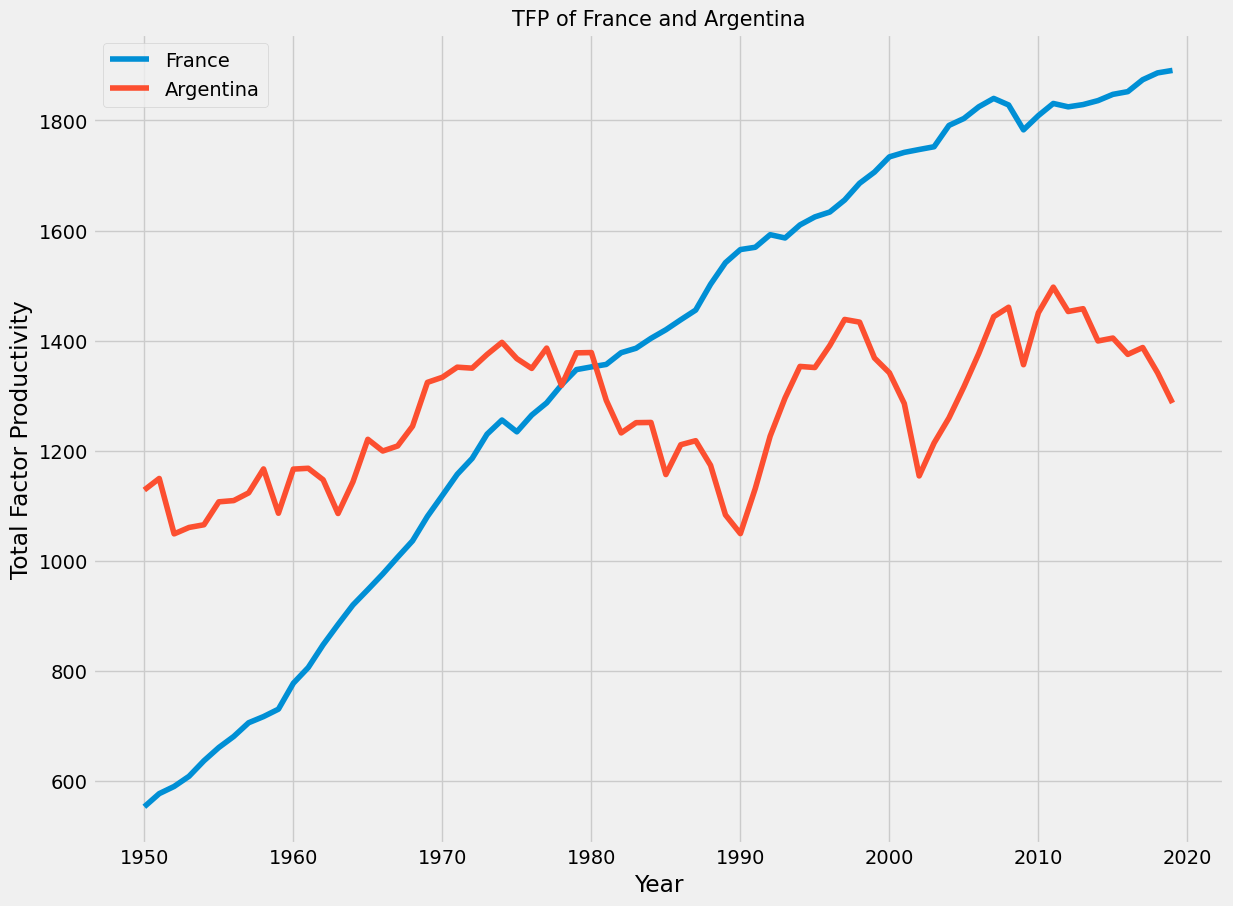

In [117]:
plt.plot(fra_df['year'], fra_df['TFP'],label='France')
plt.plot(arg_df['year'], arg_df['TFP'],label='Argentina')
plt.title('TFP of France and Argentina')
plt.xlabel('Year')
plt.ylabel('Total Factor Productivity')

plt.legend()
plt.show()

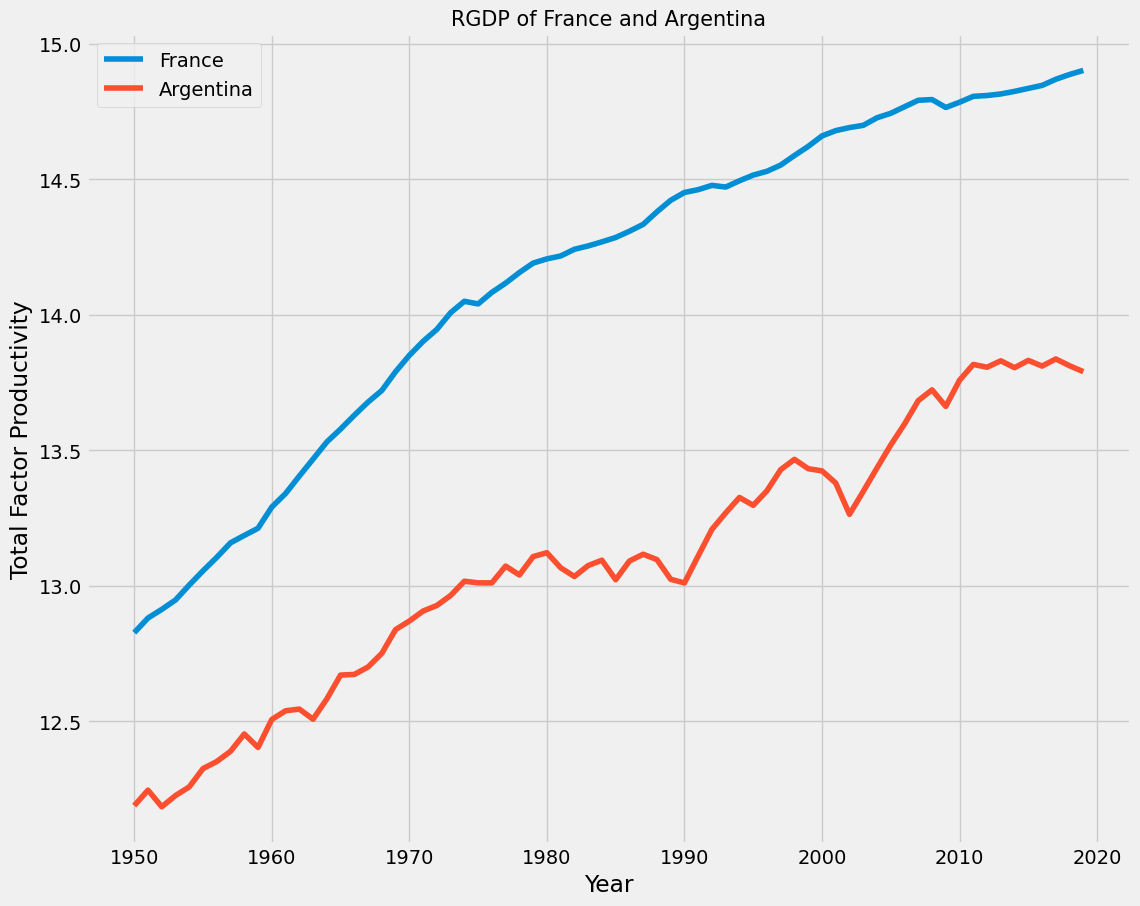

In [164]:
plt.plot(fra_df['year'], y_fra, label = 'France')
plt.plot(arg_df['year'], y_arg, label = 'Argentina')
plt.title('RGDP of France and Argentina')
plt.xlabel('Year')
plt.ylabel('Total Factor Productivity')

plt.legend()
plt.show()

Text(0, 0.5, 'Contribution of Capital to real GDP growth')

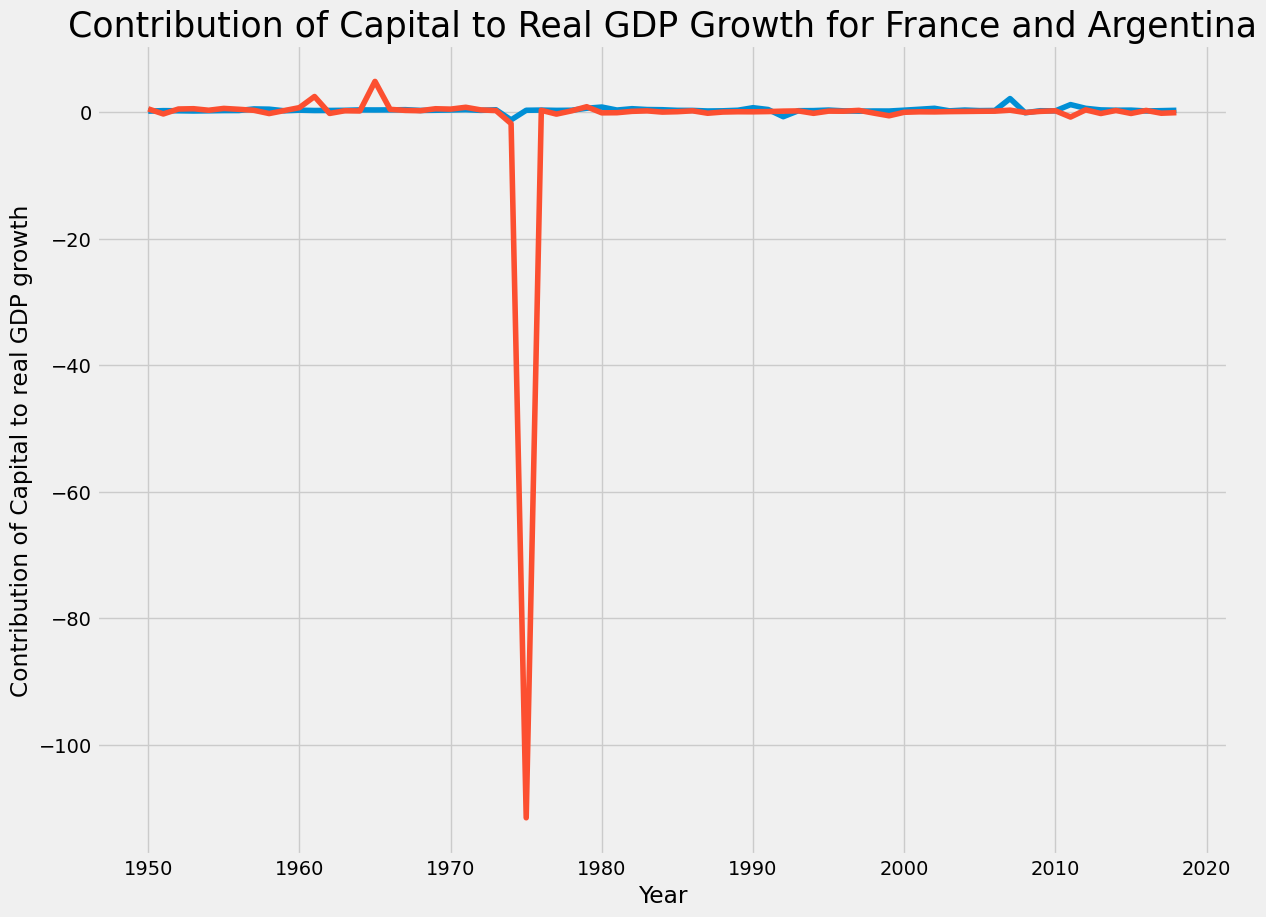

In [119]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_k, label = 'France')
plt.plot([1950 + i for i in range(T-1)], arg_contr_k, label = 'Argentina')
plt.title('Contribution of Capital to Real GDP Growth for France and Argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of Capital to real GDP growth')



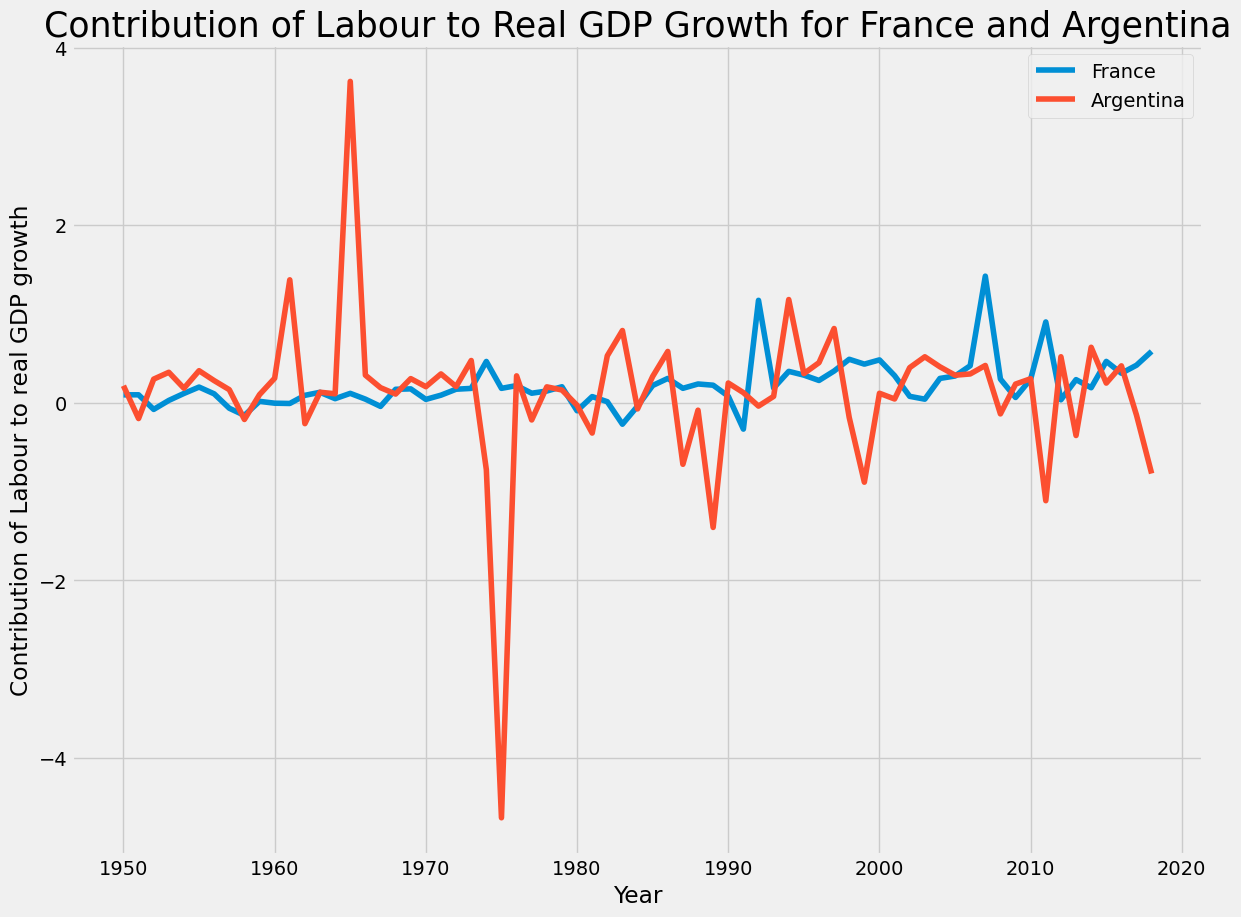

In [120]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_l, label = 'France')
plt.plot([1950 + i for i in range(T-1)], arg_contr_l, label = 'Argentina')
plt.title('Contribution of Labour to Real GDP Growth for France and Argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of Labour to real GDP growth')

plt.legend()
plt.show()

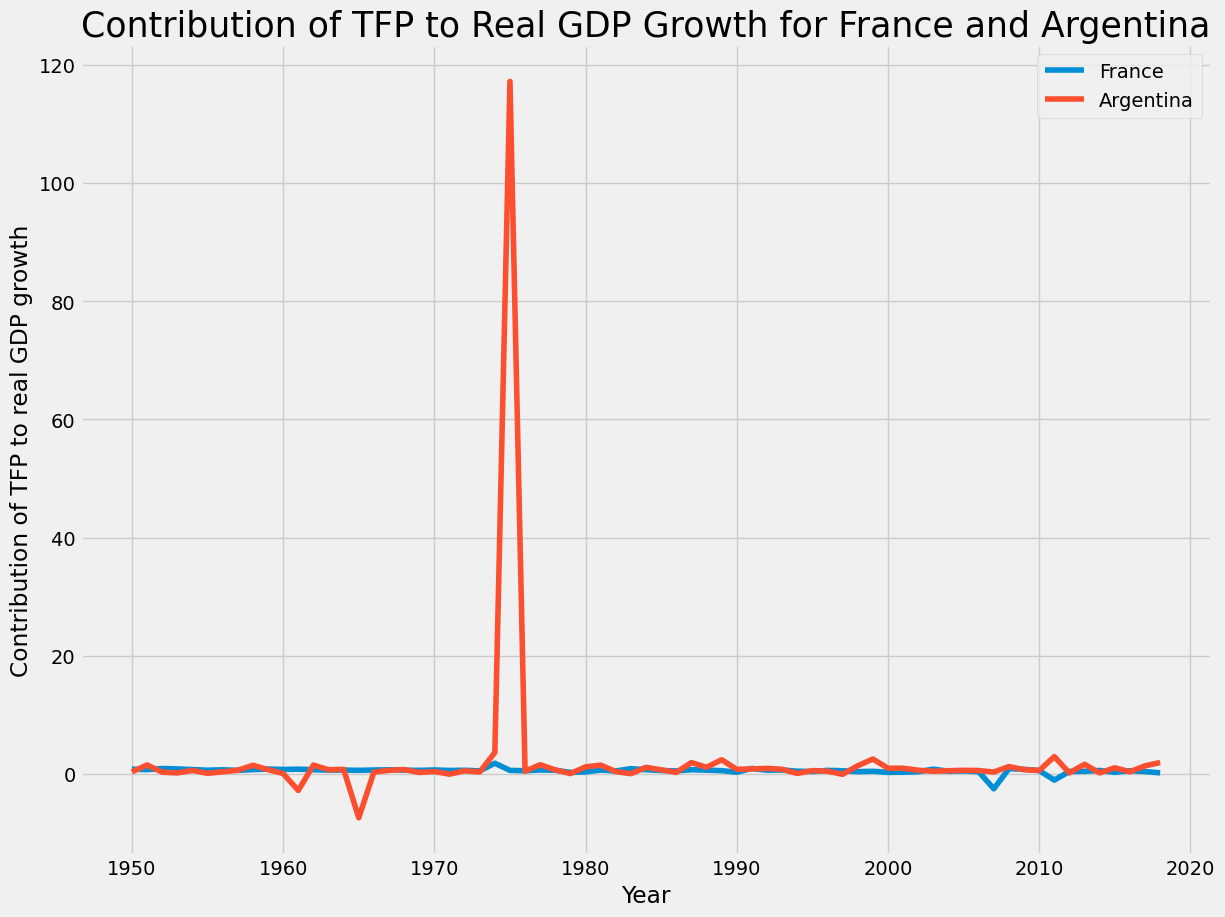

In [121]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_TFP, label = 'France')
plt.plot([1950 + i for i in range(T-1)], arg_contr_TFP, label = 'Argentina')
plt.title('Contribution of TFP to Real GDP Growth for France and Argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of TFP to real GDP growth')

plt.legend()
plt.show()

In [131]:
data = {'TFP': fra_df['TFP']}

df = pd.DataFrame(data)
df = df.set_index(fra_df['year'])

print('France')
# print the dataframe in a table format
print(df.to_string(index=True))

France
              TFP
year             
1950   553.321284
1951   577.169374
1952   590.217104
1953   608.676129
1954   636.859535
1955   660.972463
1956   681.039638
1957   705.919327
1958   717.135075
1959   730.609931
1960   777.687001
1961   806.230990
1962   847.620602
1963   884.410796
1964   919.864611
1965   947.690546
1966   976.133431
1967  1006.630583
1968  1036.320945
1969  1080.799509
1970  1118.810968
1971  1157.222396
1972  1186.077392
1973  1230.119058
1974  1255.813413
1975  1234.354494
1976  1264.811277
1977  1286.956582
1978  1319.646115
1979  1347.399088
1980  1352.282843
1981  1356.795576
1982  1378.114049
1983  1386.177957
1984  1404.175067
1985  1419.747576
1986  1437.940045
1987  1455.494783
1988  1502.372651
1989  1541.641110
1990  1565.415374
1991  1569.582704
1992  1592.441940
1993  1586.465445
1994  1610.180768
1995  1624.743974
1996  1633.590096
1997  1655.500465
1998  1685.832431
1999  1706.172307
2000  1733.803836
2001  1741.917426
2002  1747.169597
200

In [133]:
data = {'TFP': arg_df['TFP']}

df = pd.DataFrame(data)
df = df.set_index(arg_df['year'])

print('Argentina')
# print the dataframe in a table format
print(df.to_string(index=True))

Argentina
              TFP
year             
1950  1128.710657
1951  1149.630501
1952  1048.999284
1953  1060.639599
1954  1065.549956
1955  1107.210485
1956  1109.483783
1957  1123.473407
1958  1166.974182
1959  1086.460650
1960  1166.640205
1961  1168.149828
1962  1147.279899
1963  1085.957651
1964  1143.512972
1965  1220.752032
1966  1199.500262
1967  1208.677628
1968  1244.584205
1969  1324.205428
1970  1333.433275
1971  1351.777896
1972  1350.004565
1973  1374.884467
1974  1396.869706
1975  1367.315440
1976  1349.536455
1977  1386.470438
1978  1318.613441
1979  1377.775574
1980  1378.359900
1981  1291.583059
1982  1232.349644
1983  1250.996443
1984  1251.401459
1985  1156.778250
1986  1210.916882
1987  1218.226267
1988  1173.535731
1989  1083.494996
1990  1049.440891
1991  1131.420560
1992  1226.610924
1993  1295.920410
1994  1353.157816
1995  1351.124100
1996  1391.041452
1997  1438.462591
1998  1433.603692
1999  1368.445067
2000  1341.624839
2001  1285.754295
2002  1154.253118
